In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import matplotlib.dates as dates
import datetime as dt

In [2]:
df = pd.read_csv('ppz-jan-fev-2017.csv')
df.head()

,hour,views
0,0,9
1,1,0
2,2,1
3,3,2
4,4,4


In [3]:
df.tail()

,hour,views
1411,1411,55
1412,1412,55
1413,1413,9
1414,1414,39
1415,1415,15


In [8]:
def to_date(value):
    return dt.datetime(2017, 1, 1) + dt.timedelta(hours=value)
df['date'] = df['hour'].apply(to_date)
df.head()

,hour,views,date
0,0,9,2017-01-01 00:00:00
1,1,0,2017-01-01 01:00:00
2,2,1,2017-01-01 02:00:00
3,3,2,2017-01-01 03:00:00
4,4,4,2017-01-01 04:00:00


In [9]:
del df['hour']
df.tail()

,views,date
1411,55,2017-02-28 19:00:00
1412,55,2017-02-28 20:00:00
1413,9,2017-02-28 21:00:00
1414,39,2017-02-28 22:00:00
1415,15,2017-02-28 23:00:00


In [10]:
df.set_index(df['date'], inplace=True)
df.head()

,views,date
date,,
2017-01-01 00:00:00,9,2017-01-01 00:00:00
2017-01-01 01:00:00,0,2017-01-01 01:00:00
2017-01-01 02:00:00,1,2017-01-01 02:00:00
2017-01-01 03:00:00,2,2017-01-01 03:00:00
2017-01-01 04:00:00,4,2017-01-01 04:00:00


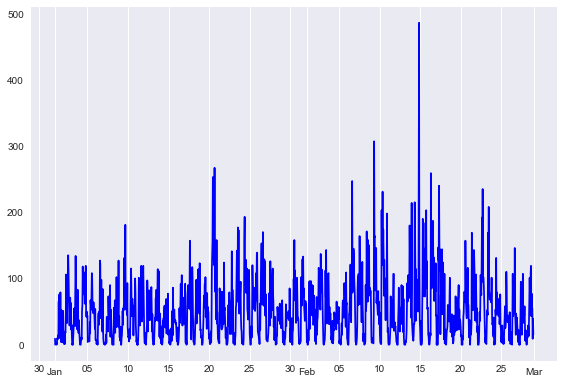

In [11]:
fig, ax = plt.subplots()
ax.plot_date(df.index.to_pydatetime(), df['views'], 'b-')
ax.xaxis.set_minor_locator(dates.DayLocator(bymonthday=range(5,32,5)))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d'))
ax.xaxis.grid(True, which='minor')
ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))
plt.tight_layout()
plt.show()